# Install Library & font
konlpy :   
https://konlpy.org/ko/latest/#  
https://konlpy-ko.readthedocs.io/ko/v0.4.4/install/  
형태소 분석 및 품사 태깅을 위한 Library

font : 기존의 폰트 사용시 한글이 깨지므로 한글폰트를 설치하여서 사용

In [23]:
#!pip install &> konlpy
!pip install konlpy &> /dev/null
!apt -qq -y install fonts-nanum &> /dev/null

# Import Library

*  Matplotlib는 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지이다.  
https://matplotlib.org/
* matplotlib.pyplot 은 플롯 그리기 위해
*  matplotlib.font_manager은 폰트 메니지를 위해. 코렙은 영어로 기능하므로 한글 폰트를 깔아줘야함. 
*  %matplotlib inline 코랩 노트북에서 설정 변경할때 %를 써줌. 코랩 노트북 창에서 그림이 구현될 수 있게 해주는 코드
*  폰트 경로설정하고 NanumBarunGothic체이고 size9 이라는 것을 알려줌
*  fm._rebuild를 통해 폰트 재설정 실행
*  %config InlineBackend.figure_format = 'retina' 는 더 선명하게 나오도록 해줌
*  plt.rc......  plot에도 해당 폰트를 설정해 줌



In [24]:
from PIL import Image # 이미지+워드크라우드용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='NanumBarunGothic') 

**품사 태깅 클래스 간 비교**    

Time analysis  
로딩 시간: 사전 로딩을 포함하여 클래스를 로딩하는 시간 (*켜지는 시간)  
* Kkma: 5.6988 secs  
* Komoran: 5.4866 secs  
* Hannanum: 0.6591 secs  
* Okt (previous Twitter): 1.4870 secs  
* Mecab: 0.0007 secs  

실행시간: 10만 문자의 문서를 대상으로 각 클래스의 pos 메소드를 실행하는데 소요되는 시간.  
* Kkma: 35.7163 secs  
* Komoran: 25.6008 secs  
* Hannanum: 8.8251 secs  
* Okt (previous Twitter): 2.4714 secs  
* Mecab: 0.2838 secs  

---

한국어품사 태그 비교표   
https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0

---


from konlpy.tag import Okt : 
- tag 클래스 중에서 Okt을 사용하기 위한 Library  
- konlpy : https://konlpy.org/en/latest/#

from collections import Counter : 
- word count Library  
- https://docs.python.org/3/library/collections.html#collections.Counter

from wordcloud import WordCloud :
- WordCloud를 사용하기 위한 Library  
- WordCloud : https://amueller.github.io/word_cloud/index.html 

import pandas as pd :
- Dataframe Library

In [25]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import pandas as pd
import numpy as np

# read_csv

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*  동아일보 10년치 데이터 (학생 스크롤링 자료) 

*  동아일보 1년치(2019.9.1-2019.8.31) 데이터 (학생 스크롤링 자료)

In [27]:
df = pd.read_csv("/content/drive/MyDrive/소셜빅데이터분석_2021/W11_LDA/donga_2019_2020.csv")

In [28]:
df.head(5)

,Unnamed: 0,Title,Content,Date
0,0,변협 “8·15집회 허가한 법관 비난은 사법부 독립 침해”,"['\n', '변협 ""법관개인 공격…소신 지키기 어려워""', '\r\n""사법부 독립...",입력 2020-08-31 17:38
1,1,"이정옥 “여가부 폐지론, 국민 수용성·이해 부족 탓”","['\n', '이정옥 여성가족부 장관. 출처= 뉴시스', '이정옥 여성가족부 장관이...",입력 2020-08-31 15:49
2,2,강경화 “뉴질랜드 성추행 사건에 어떤 형태로든 책임질 것”,"['\n', '""피해자 고통 십분 공감…사과는 신중 기해야""', '\r\n""피해자,...",입력 2020-08-31 12:01
3,3,"서울시, ‘대면예배 강행’ 교회 40곳 적발…동문·영천 성결 고발","['\n', '31일 중앙방역대책본부에 따르면 이날 0시 기준 코로나19 신규 확진...",입력 2020-08-31 11:07
4,4,이탄희표 사법개혁 신호탄…‘전관예우 근절 3법’ 발의,"['\n', ""판사 시절 '사법부 블랙리스트' 세상에 알려"", '\r\n검찰청법·형...",입력 2020-08-31 09:56


In [29]:
def cleaning_contents_of_article(content):
  [x.extract() for x in content[0].findAll('script')]
  [x.extract() for x in content[0].findAll('ul')]
  [x.extract() for x in content[0].findAll('strong')]
  [x.extract() for x in content[0].findAll('span')]
  [x.extract() for x in content[0].findAll('a')]
  [x.extract() for x in content[0].findAll('p')]

In [30]:
df['Date'] = df['Date'].str.replace('[^0-9]', '', regex=True)
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [31]:
df = df.drop(['Date'], axis=1)

In [32]:
df['Content'] = df['Content'].str.replace(r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)", '')

In [33]:
df['Content'] = df['Content'].str.replace('[', '')
df['Content'] = df['Content'].str.replace(']', '')
df['Content'] = df['Content'].str.replace("'", "")  
df['Content'] = df['Content'].str.replace('"', '')
df['Content'] = df['Content'].str.replace(',', '')
df['Content'] = df['Content'].str.replace(r'\\n', '') 
df['Content'] = df['Content'].str.replace(r'\\r', '')
df['Content'] = df['Content'].str.replace(r'\\u3000', '')
df['Content'] = df['Content'].str.replace(r'‘', '')
df['Content'] = df['Content'].str.replace(r'’', '')
df['Content'] = df['Content'].str.replace(r'“', '')
df['Content'] = df['Content'].str.replace(r'”', '')
df['Content'] = df['Content'].str.replace(r'.', '')
df['Content'] = df['Content'].str.replace(r'/106061858/Donga_DT_NEWS_CV_Main', '') 
df['Content'] = df['Content'].str.replace(r'  ', '')

In [34]:
df['Content'] = df['Content'].str.replace(r'\(([^)]+)\)', '')
df['Content'] = df['Content'].str.replace(r'\[([^]]+)\]', '')

In [35]:
df['Title'] = df['Title'].str.replace('‘', '')
df['Title'] = df['Title'].str.replace('’', '')
df['Title'] = df['Title'].str.replace(',', '')
df['Title'] = df['Title'].str.replace('[', '')
df['Title'] = df['Title'].str.replace(']', '')
df['Title'] = df['Title'].str.replace('…', '')
df['Title'] = df['Title'].str.replace('-', ' ')
df['Title'] = df['Title'].str.replace('“', '')
df['Title'] = df['Title'].str.replace('”', '')
df['Title'] = df['Title'].str.replace('?', '')
df['Title'] = df['Title'].str.replace('＞', '') # replace 항목 추가
df['Title'] = df['Title'].str.replace('＜', '')
df['Title'] = df['Title'].str.replace('△', '')
df['Title'] = df['Title'].str.replace('▽', '')

In [36]:
df.head(5)

,Unnamed: 0,Title,Content,Year,Month,Day
0,0,변협 8·15집회 허가한 법관 비난은 사법부 독립 침해,변협 법관개인 공격…소신 지키기 어려워 사법부 독립은 엄정하게 보장돼야 당부 해임...,2020,8,31
1,1,이정옥 여가부 폐지론 국민 수용성·이해 부족 탓,이정옥 여성가족부 장관 출처= 뉴시스 이정옥 여성가족부 장관이 여가부 폐지론이 나...,2020,8,31
2,2,강경화 뉴질랜드 성추행 사건에 어떤 형태로든 책임질 것,피해자 고통 십분 공감…사과는 신중 기해야 피해자 새로운 사실 추가…내용 확인 필...,2020,8,31
3,3,서울시 대면예배 강행 교회 40곳 적발동문·영천 성결 고발,31일 중앙방역대책본부에 따르면 이날 0시 기준 코로나19 신규 확진자는 248명...,2020,8,31
4,4,이탄희표 사법개혁 신호탄전관예우 근절 3법 발의,판사 시절 사법부 블랙리스트 세상에 알려 검찰청법·형사소송법·민사소송법 개정안박근...,2020,8,31


Okt = Okt() 
- Okt 클래스를 사용하기 위한 변수

morphs = []
-  문장에서 분리한 단어들을 저장할 리스트 자료형

for sentence in df['Content']
- 기사 내용에 순차적으로 접근하는 반복문

morphs.append(twitter.pos(sentence))
- 문장을 단어로 나눈후에 품사를 태깅한 후에 리스트에 넣는다.

In [37]:
Okt = Okt()
morphs = []

for sentence in df['Content']:
    morphs.append(Okt.pos(sentence))

In [38]:
print(morphs[0])

[('변협', 'Noun'), ('법관', 'Noun'), ('개인', 'Noun'), ('공격', 'Noun'), ('…', 'Punctuation'), ('소신', 'Noun'), ('지키기', 'Verb'), ('어려워', 'Adjective'), ('사법부', 'Noun'), ('독립', 'Noun'), ('은', 'Josa'), ('엄정하게', 'Adjective'), ('보장', 'Noun'), ('돼야', 'Verb'), ('당부', 'Noun'), ('해임', 'Noun'), ('요구', 'Noun'), ('청와대', 'Noun'), ('국민', 'Noun'), ('청원', 'Noun'), ('30만', 'Number'), ('명', 'Foreign'), ('넘어', 'Verb'), ('8', 'Number'), ('·', 'Punctuation'), ('15', 'Number'), ('광화문', 'Noun'), ('집회', 'Noun'), ('를', 'Josa'), ('계기', 'Noun'), ('로', 'Josa'), ('신종', 'Noun'), ('코로나', 'Noun'), ('바이러스', 'Noun'), ('감염증', 'Noun'), ('이', 'Josa'), ('다시', 'Noun'), ('확산', 'Noun'), ('되자', 'Verb'), ('집회', 'Noun'), ('를', 'Josa'), ('허가', 'Noun'), ('한', 'Josa'), ('법원', 'Noun'), ('에', 'Josa'), ('비난', 'Noun'), ('의', 'Josa'), ('화살', 'Noun'), ('이', 'Josa'), ('쏠린', 'Verb'), ('가운데', 'Noun'), ('변호사', 'Noun'), ('단체', 'Noun'), ('가', 'Josa'), ('법관', 'Noun'), ('개인', 'Noun'), ('에', 'Josa'), ('대한', 'Noun'), ('공격성', 'Noun'), ('발언', 'Noun'), ('은', 

noun_list=[]  
- 태깅한 단어들 중에서 명사만 저장할 리스트

for sentence in morphs :
- 기사의 문장에서 태깅한 단어들을 하나씩 접근한다.

for word, tag in sentence :
- word : 단어, tag : 품사 

if tag in ['Noun'] and ('이' not in word): noun_list.append(word)
- 품사가 명사이고 단어가 '이'가 아닌 단어들을 리스트에 넣는다.

In [39]:
noun_list=[] 
for sentence in morphs: 
    for word, tag in sentence: 
        if tag in ['Noun'] and ('이' not in word) and ('것' not in word) and ('등' not in word) and ('수' not in word) and ('전' not in word) and ('그' not in word) and ('왜' not in word) and ('기사' not in word): 
            noun_list.append(word) 

In [40]:
#print(noun_list)
noun_list 

['변협',
 '법관',
 '개인',
 '공격',
 '소신',
 '사법부',
 '독립',
 '보장',
 '당부',
 '해임',
 '요구',
 '청와대',
 '국민',
 '청원',
 '광화문',
 '집회',
 '계기',
 '신종',
 '코로나',
 '감염증',
 '다시',
 '확산',
 '집회',
 '허가',
 '법원',
 '비난',
 '화살',
 '가운데',
 '변호사',
 '단체',
 '법관',
 '개인',
 '대한',
 '공격성',
 '발언',
 '사법부',
 '독립성',
 '침해',
 '대한',
 '우려',
 '입장',
 '변호사',
 '협회',
 '성명',
 '를',
 '통해',
 '지난',
 '광화문',
 '집회',
 '허가',
 '법관',
 '해임',
 '청와대',
 '국민',
 '청원',
 '정치권',
 '법관',
 '허가',
 '결정',
 '비판',
 '변협',
 '먼저',
 '법원',
 '코로나',
 '확산',
 '위험',
 '상황',
 '광화문',
 '집회',
 '허가',
 '여부',
 '검토',
 '아쉬움',
 '표',
 '감염병',
 '확산',
 '위기',
 '현실',
 '만큼',
 '집회',
 '자유',
 '공공',
 '건강',
 '국민',
 '생명',
 '대한',
 '침해',
 '가능성',
 '허가',
 '여부',
 '결정',
 '법원',
 '결정',
 '지적',
 '열병',
 '신형',
 '공개',
 '사거리',
 '탄두',
 '중량',
 '확장',
 '열병',
 '신형',
 '공개',
 '사거리',
 '탄두',
 '중량',
 '대폭',
 '확장',
 '변협',
 '사법권',
 '독립',
 '법관',
 '독립',
 '법질서',
 '민주주의',
 '법치',
 '주의',
 '실현',
 '근간',
 '며',
 '법원',
 '집회',
 '허가',
 '결정',
 '법관',
 '개인',
 '대한',
 '공격',
 '비난',
 '지속',
 '법관',
 '소신',
 '여론',
 '영합',
 '판단',
 '위험',
 '지적',
 '법관',
 '독립'

# 단어들의 빈도수 세기
from collections import Counter  
위에서 선언한 Counter을 활용한 단어들의 빈도수 세기

In [41]:
count = Counter(noun_list)

In [42]:
print(count)

Counter({'검찰': 12737, '주민': 7773, '추천': 7523, '한국': 7495, '공개': 7388, '장관': 6739, '열병': 6639, '인권': 6586, '조국': 6195, '확장': 5696, '신형': 5630, '사거리': 5626, '중량': 5620, '탄두': 5617, '더': 5464, '문': 5251, '말': 5218, '대한': 5077, '대통령': 4989, '뉴스': 4735, '관련': 4620, '민주주의': 4490, '온': 4258, '속': 4200, '차례': 4183, '대해': 4171, '국민': 4126, '터': 4015, '기회': 3991, '통신': 3949, '준': 3905, '층': 3894, '정부': 3819, '위험': 3808, '박근혜': 3799, '장비': 3761, '단독': 3753, '사기': 3715, '창': 3714, '법무부': 3705, '막': 3703, '사건': 3673, '조사': 3656, '영웅': 3648, '계단': 3641, '부품': 3632, '진중권': 3632, '재앙': 3629, '소방관': 3620, '행각': 3618, '명': 3609, '옵티머스': 3605, '침투': 3604, '낫': 3603, '베스트': 3600, '불길': 3600, '구조대': 3599, '내무반': 3596, '똘마니': 3595, '김밥': 3595, '개혁': 3580, '중국': 3500, '미국': 3497, '조': 3493, '위': 3464, '대폭': 3421, '날': 3392, '의원': 3156, '문제': 3121, '북한': 3086, '우리': 2954, '서울': 2850, '위해': 2834, '검사': 2714, '씨': 2683, '경찰': 2640, '의혹': 2511, '홍콩': 2505, '기자': 2494, '대표': 2418, '사실': 2365, '민주당': 2351, '피해자': 

count.most_common(100)
* 상위 100개의 단어들을 선정한다.

In [43]:
words = dict(count.most_common(100))

In [44]:
print(words)

{'검찰': 12737, '주민': 7773, '추천': 7523, '한국': 7495, '공개': 7388, '장관': 6739, '열병': 6639, '인권': 6586, '조국': 6195, '확장': 5696, '신형': 5630, '사거리': 5626, '중량': 5620, '탄두': 5617, '더': 5464, '문': 5251, '말': 5218, '대한': 5077, '대통령': 4989, '뉴스': 4735, '관련': 4620, '민주주의': 4490, '온': 4258, '속': 4200, '차례': 4183, '대해': 4171, '국민': 4126, '터': 4015, '기회': 3991, '통신': 3949, '준': 3905, '층': 3894, '정부': 3819, '위험': 3808, '박근혜': 3799, '장비': 3761, '단독': 3753, '사기': 3715, '창': 3714, '법무부': 3705, '막': 3703, '사건': 3673, '조사': 3656, '영웅': 3648, '계단': 3641, '부품': 3632, '진중권': 3632, '재앙': 3629, '소방관': 3620, '행각': 3618, '명': 3609, '옵티머스': 3605, '침투': 3604, '낫': 3603, '베스트': 3600, '불길': 3600, '구조대': 3599, '내무반': 3596, '똘마니': 3595, '김밥': 3595, '개혁': 3580, '중국': 3500, '미국': 3497, '조': 3493, '위': 3464, '대폭': 3421, '날': 3392, '의원': 3156, '문제': 3121, '북한': 3086, '우리': 2954, '서울': 2850, '위해': 2834, '검사': 2714, '씨': 2683, '경찰': 2640, '의혹': 2511, '홍콩': 2505, '기자': 2494, '대표': 2418, '사실': 2365, '민주당': 2351, '피해자': 2346, '중

# WordCloud
*   font_path : 한글 폰트의 경로
*   background_color : 배경 색
*   width : 가로폭
*   height : 세로폭
*   max_words : 이미지에 넣을 최대 단어 수 지정
*   max_font_size : 이미지에 넣을 최대 폰트 크기를 지정

#  다양한 모양으로...
https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py



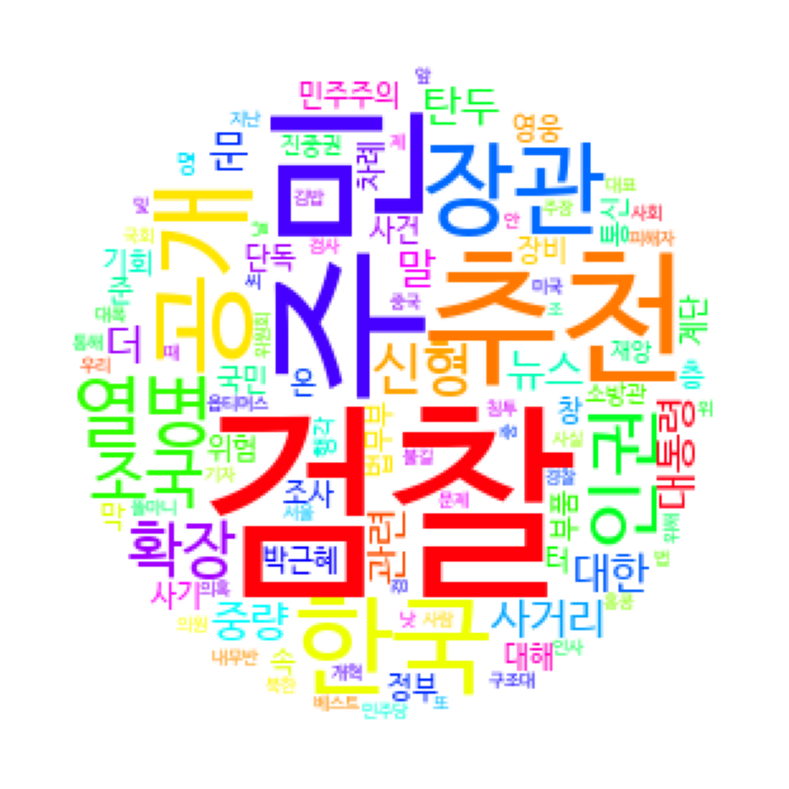

In [45]:
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


# wc = WordCloud(background_color="white", repeat=True, mask=mask)
# wc.generate(words)

# plt.axis("off")
# plt.imshow(wc, interpolation="bilinear")
# plt.show()

wordcloud = WordCloud(font_path = fontpath, 
                      background_color='white',
                      #colormap = "Accent_r",
                      colormap = "gist_rainbow_r",
                      #colormap = "spring_r",
                      #colormap = "winter_r",
                      mask=mask).generate_from_frequencies(words)

fig = plt.figure(figsize=(7, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

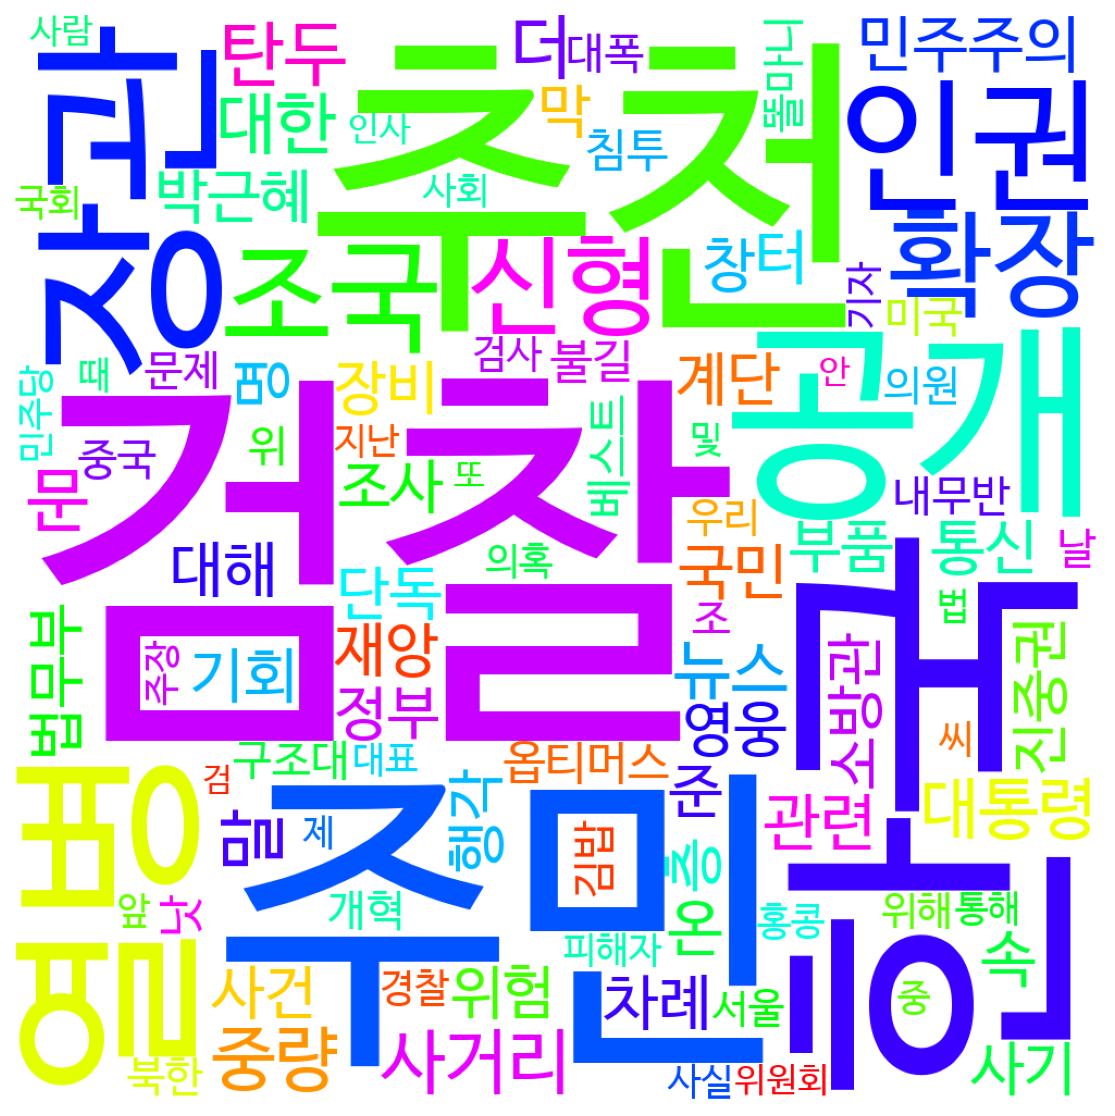

In [46]:
wordcloud = WordCloud(font_path = fontpath, 
                      background_color='white',
                      #colormap = "Accent_r",
                      colormap = "gist_rainbow_r",
                      #colormap = "spring_r",
                      #colormap = "winter_r",
                      width=1000, 
                      height=1000).generate_from_frequencies(words)

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#  Mask 방법 활용한 워드클라우드 예시
*  wget 리눅스 명령어를 통해 alice_mask.png 그리고 V1hPnPI.jpg 두개의 웹 파일을 코랩의 현재 디렉토리에 가져옵니다. 
*  Image.open 함수로 이미지를 mask에 넣은뒤, 이것을 WordCloud 함수 세부 옵션에 넣어주면 끝!

In [47]:
!wget https://lovit.github.io/assets/figures/alice_mask.png &> /dev/null

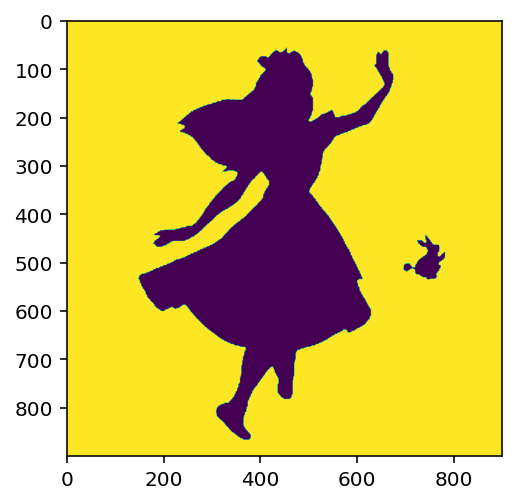

In [48]:
mask = np.array(Image.open("alice_mask.png"))
plt.imshow(mask)

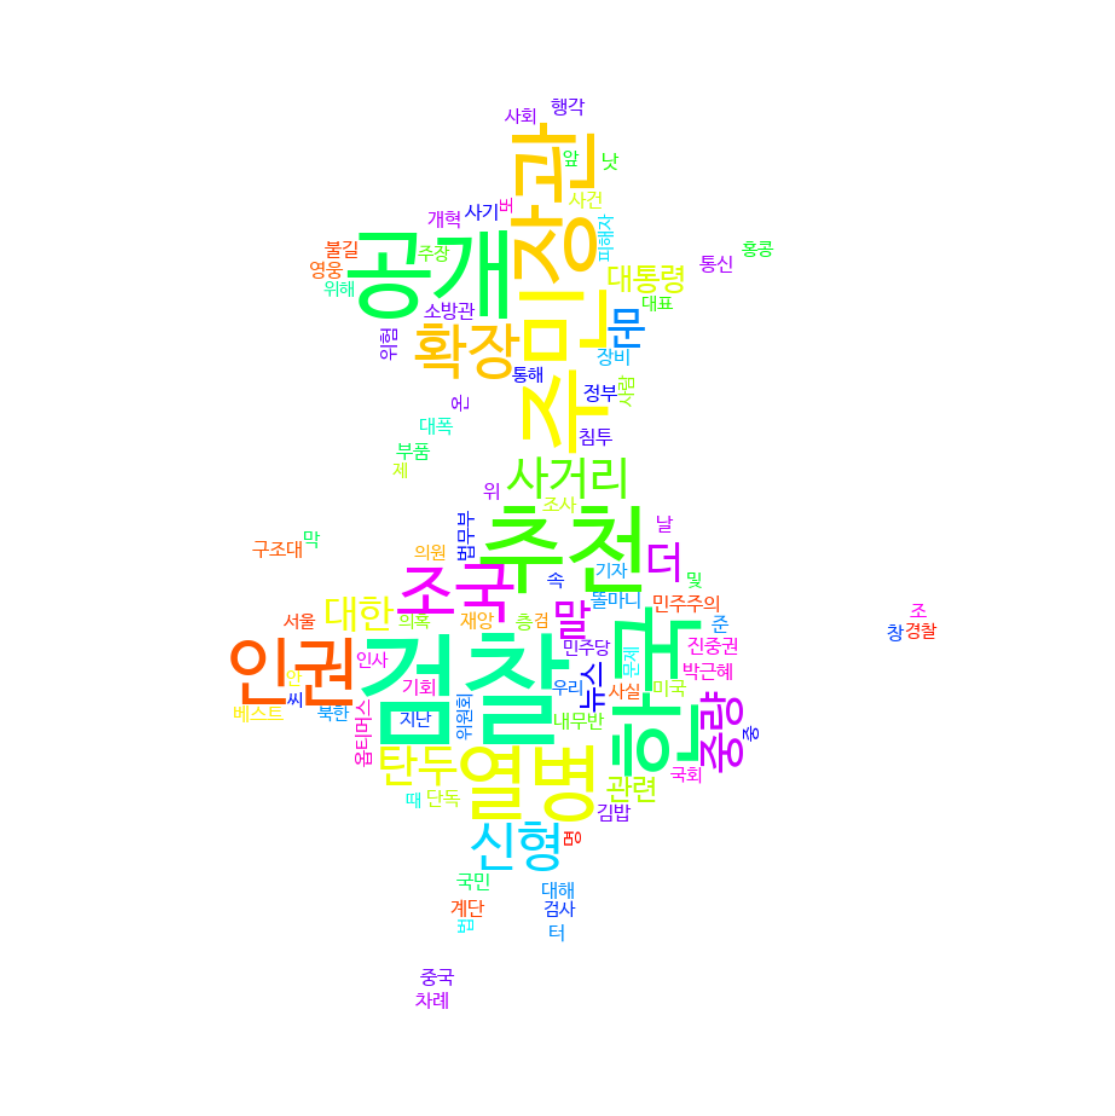

In [49]:
wordcloud = WordCloud(font_path = fontpath, 
                      mask=mask,
                      background_color='white',
                      max_words=100,
                      max_font_size=100,
                      height=mask.shape[0],
                      width=mask.shape[1],
                      #colormap = 'Accent_r').generate_from_frequencies(words)
                      colormap = "gist_rainbow_r").generate_from_frequencies(words)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

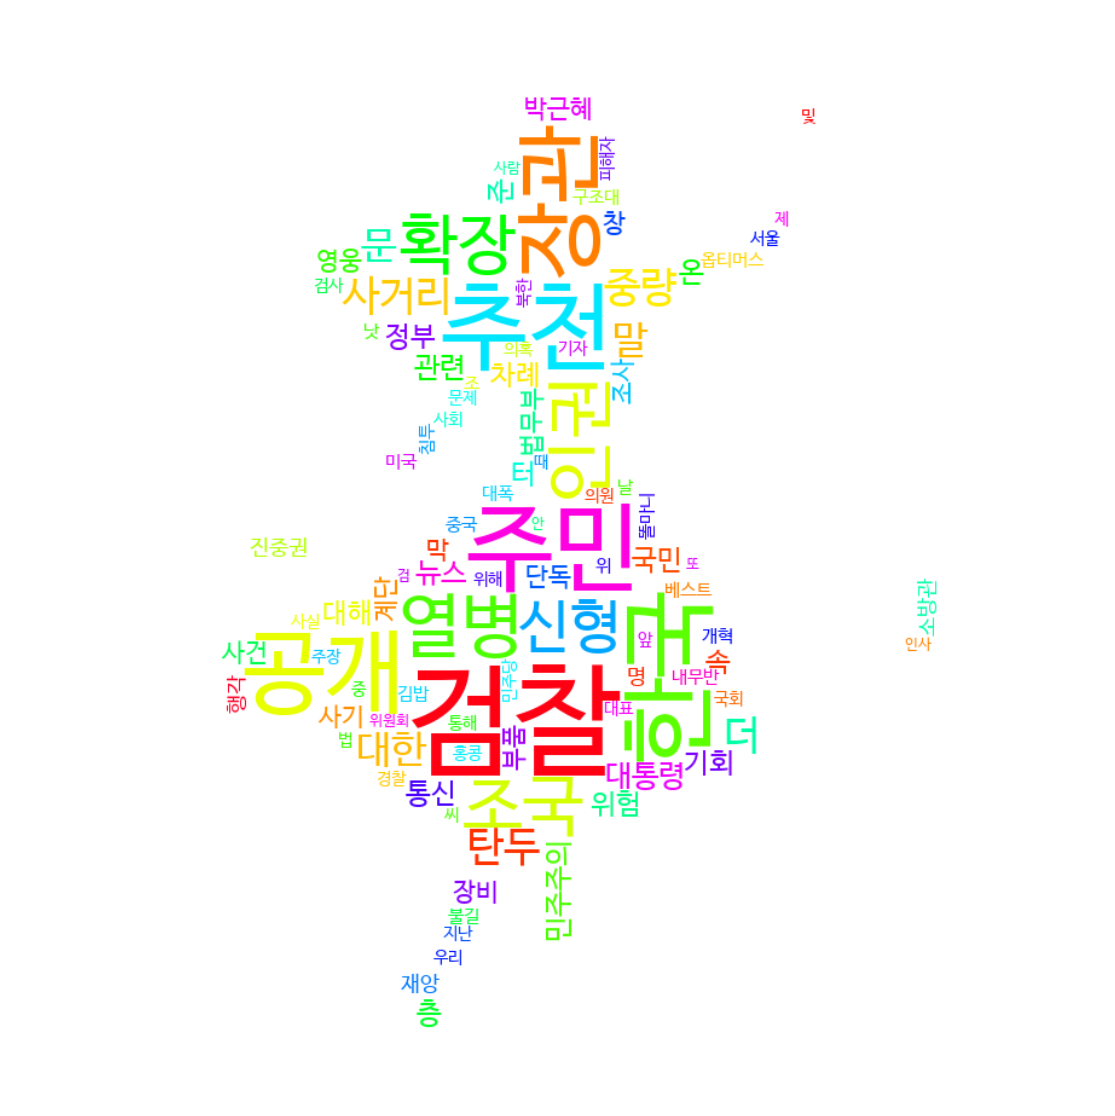

In [50]:
wordcloud = WordCloud(font_path = fontpath, 
                      mask=mask,
                      background_color='white',
                      max_words=100,
                      max_font_size=100,
                      height=mask.shape[0],
                      width=mask.shape[1],
                      #colormap = 'Accent_r').generate_from_frequencies(words)
                      colormap = "gist_rainbow_r").generate_from_frequencies(words)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [51]:
!wget https://i.imgur.com/V1hPnPI.jpg

--2021-05-04 14:29:50--  https://i.imgur.com/V1hPnPI.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.248.193
Connecting to i.imgur.com (i.imgur.com)|151.101.248.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20466 (20K) [image/jpeg]
Saving to: ‘V1hPnPI.jpg’

V1hPnPI.jpg         100%[===================>]  19.99K  --.-KB/s    in 0.001s  

2021-05-04 14:29:50 (34.1 MB/s) - ‘V1hPnPI.jpg’ saved [20466/20466]



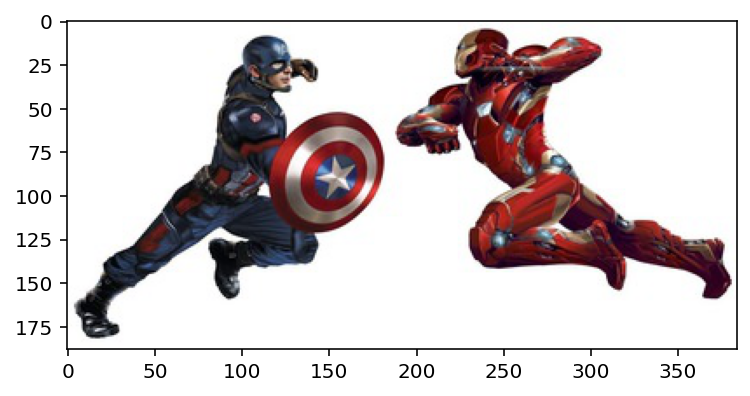

In [52]:
mask = np.array(Image.open("V1hPnPI.jpg"))
plt.imshow(mask)

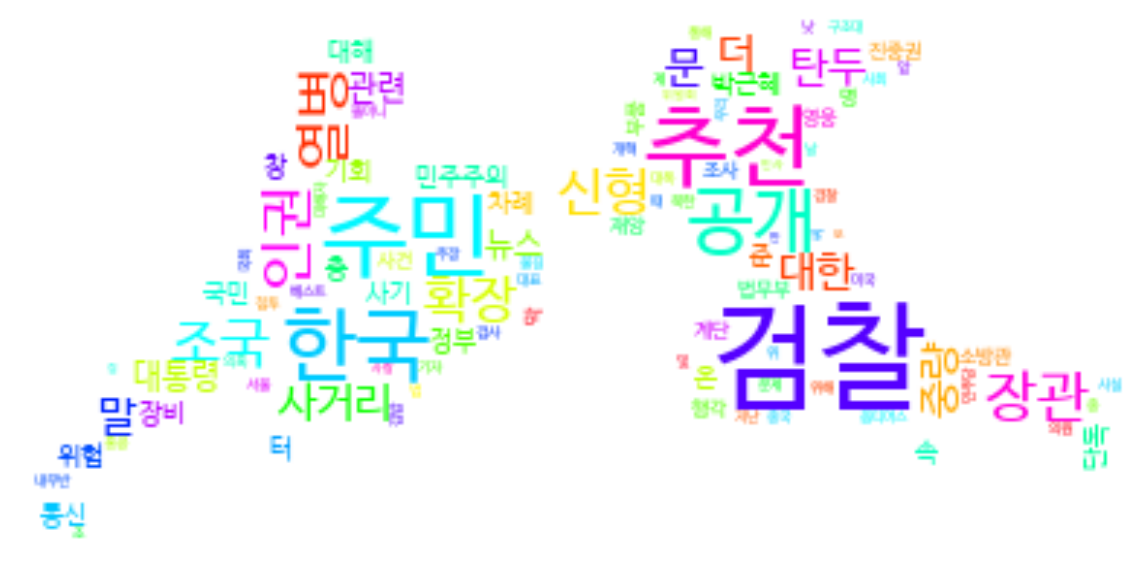

In [53]:
wordcloud = WordCloud(font_path = fontpath, 
                      mask=mask,
                      background_color='white',
                      max_words=100,
                      max_font_size=100,
                      height=mask.shape[0],
                      width=mask.shape[1],
                      colormap = "gist_rainbow_r").generate_from_frequencies(words)

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()